In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_table('Airfares.txt',delim_whitespace=True,header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [6]:
data.columns = ['City1','City2','Average_fare','Distance','Avg_weekly_pass','Leading_Airline','Leading_Airline_market_share','Avg_fare_lead','Low_price_airline','Low_airline_market_share','Avg_fare_low']

In [7]:
data.head()

,City1,City2,Average_fare,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share,Avg_fare_low
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [8]:
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])

Rows: 1000
Columns: 11


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City1                         1000 non-null   object 
 1   City2                         1000 non-null   object 
 2   Average_fare                  1000 non-null   float64
 3   Distance                      1000 non-null   int64  
 4   Avg_weekly_pass               1000 non-null   float64
 5   Leading_Airline               1000 non-null   object 
 6   Leading_Airline_market_share  1000 non-null   float64
 7   Avg_fare_lead                 1000 non-null   float64
 8   Low_price_airline             1000 non-null   object 
 9   Low_airline_market_share      1000 non-null   float64
 10  Avg_fare_low                  1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Average_fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Avg_weekly_pass,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
Leading_Airline_market_share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Avg_fare_lead,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
Low_airline_market_share,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
Avg_fare_low,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [11]:
data.describe(include='object').T

,count,unique,top,freq
City1,1000,90,ATL,64
City2,1000,85,TPA,46
Leading_Airline,1000,16,WN,257
Low_price_airline,1000,19,WN,230


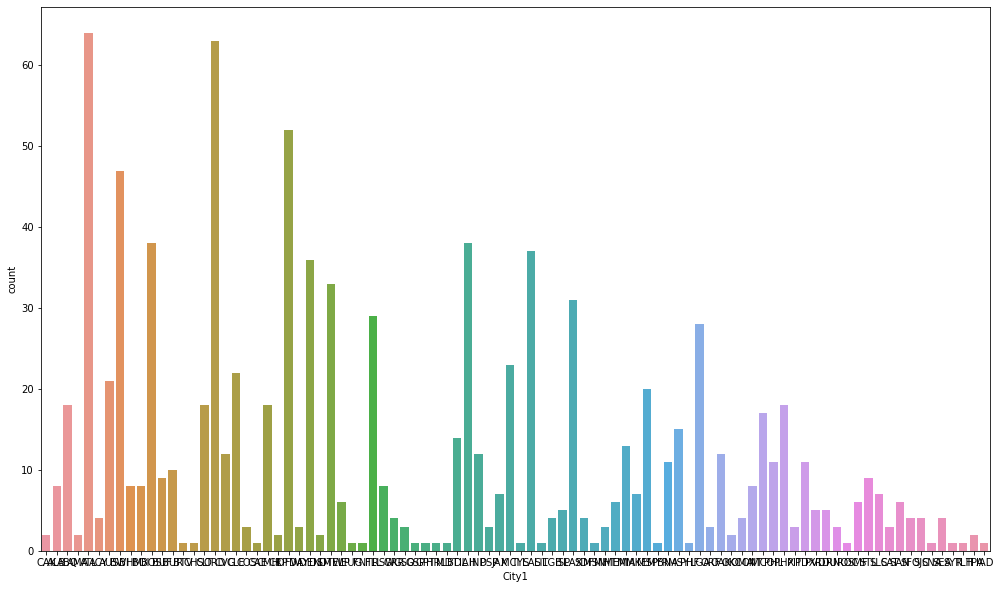

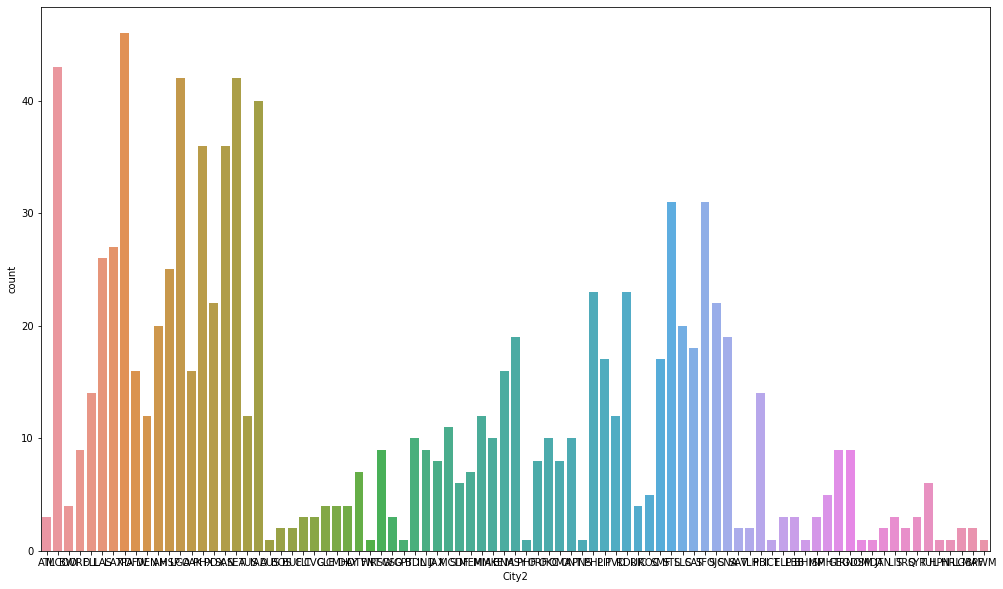

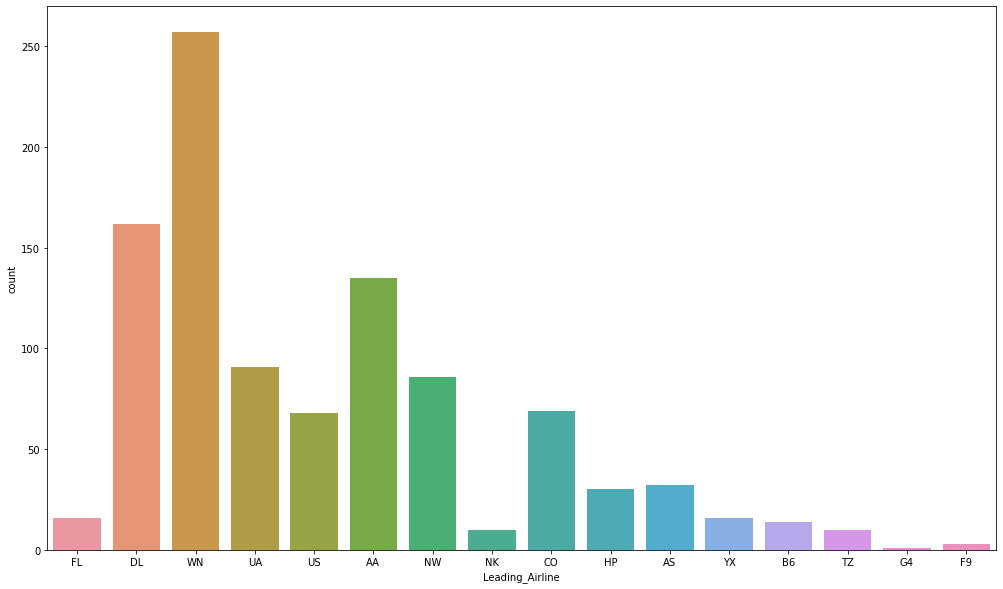

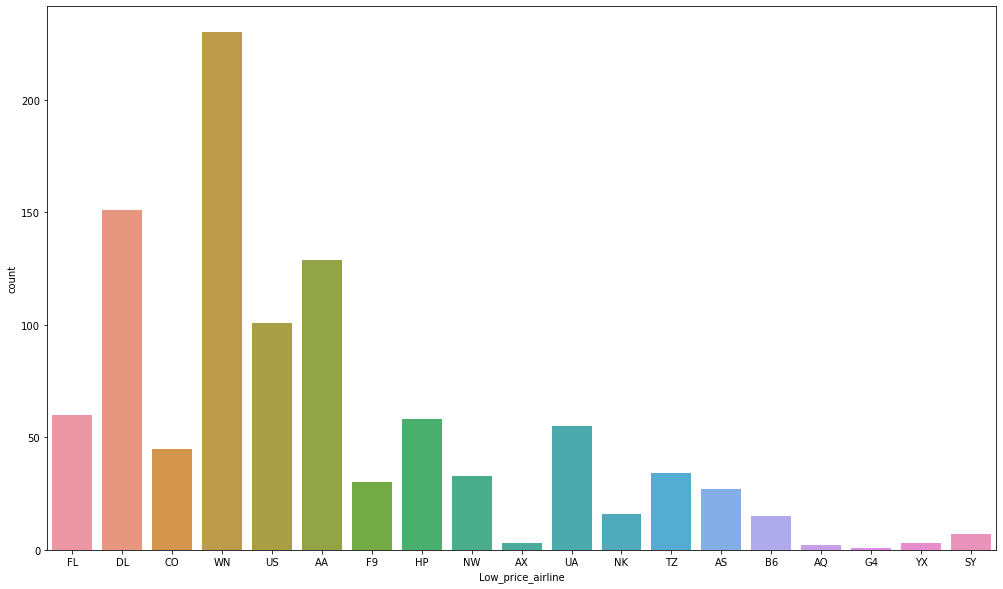

In [12]:
# Count Plot of categorical columns
for i in ['City1','City2','Leading_Airline','Low_price_airline']:
    plt.figure(figsize=(17,10))
    sns.countplot(data[i])

In [13]:
for i in ['Leading_Airline','Low_price_airline']:
    print(i)
    print(round((data[i].value_counts()/len(data[i]))*100,2))
    print()

Leading_Airline
WN    25.7
DL    16.2
AA    13.5
UA     9.1
NW     8.6
CO     6.9
US     6.8
AS     3.2
HP     3.0
FL     1.6
YX     1.6
B6     1.4
NK     1.0
TZ     1.0
F9     0.3
G4     0.1
Name: Leading_Airline, dtype: float64

Low_price_airline
WN    23.0
DL    15.1
AA    12.9
US    10.1
FL     6.0
HP     5.8
UA     5.5
CO     4.5
TZ     3.4
NW     3.3
F9     3.0
AS     2.7
NK     1.6
B6     1.5
SY     0.7
YX     0.3
AX     0.3
AQ     0.2
G4     0.1
Name: Low_price_airline, dtype: float64



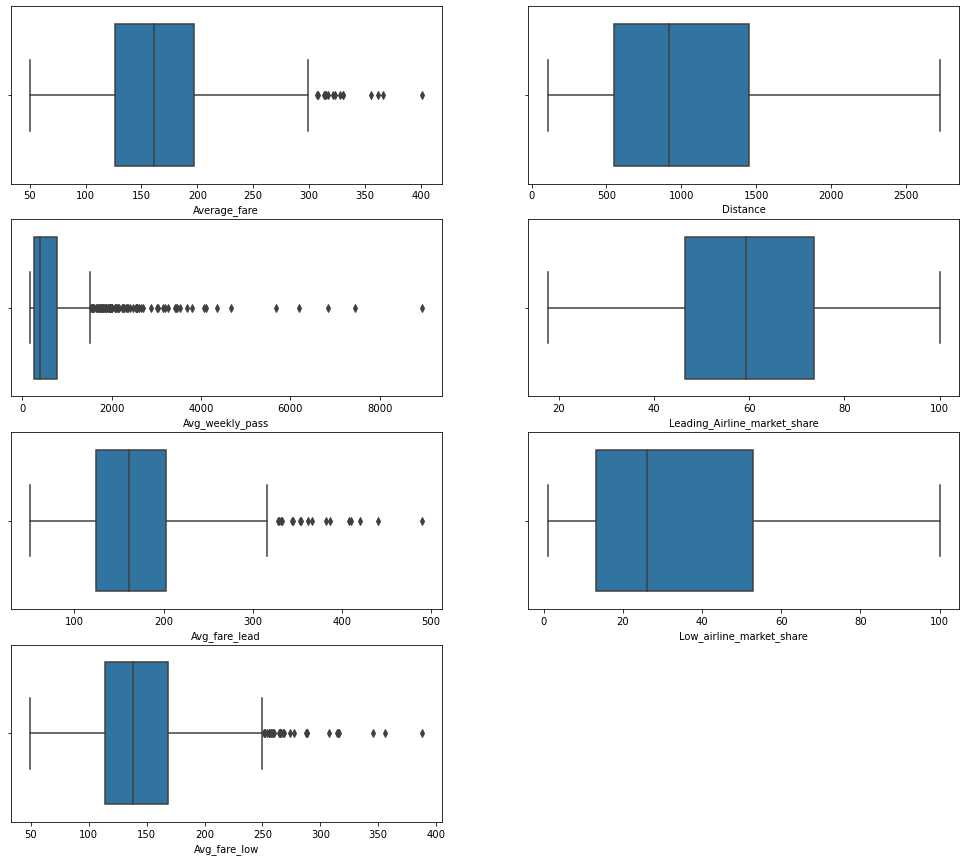

In [14]:
# BOX Plot for Numeric columns
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    t=t+1

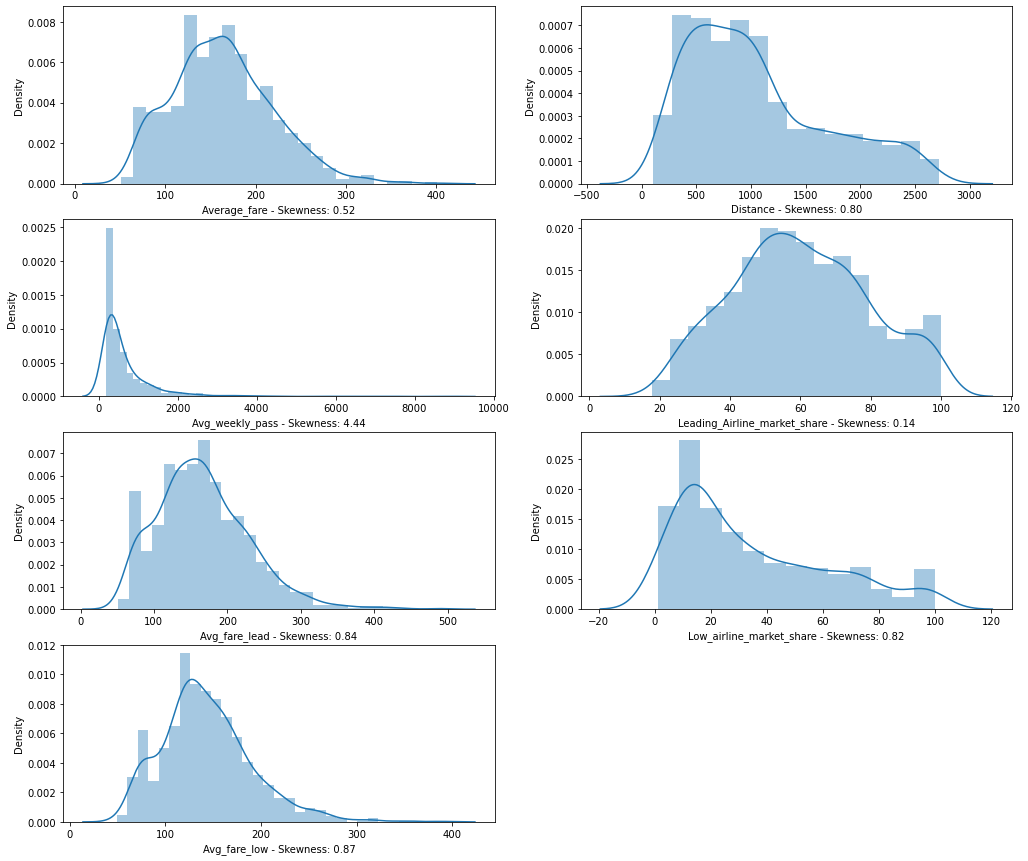

In [15]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s - Skewness: %.2f'%(i,data[i].skew()))
    t=t+1

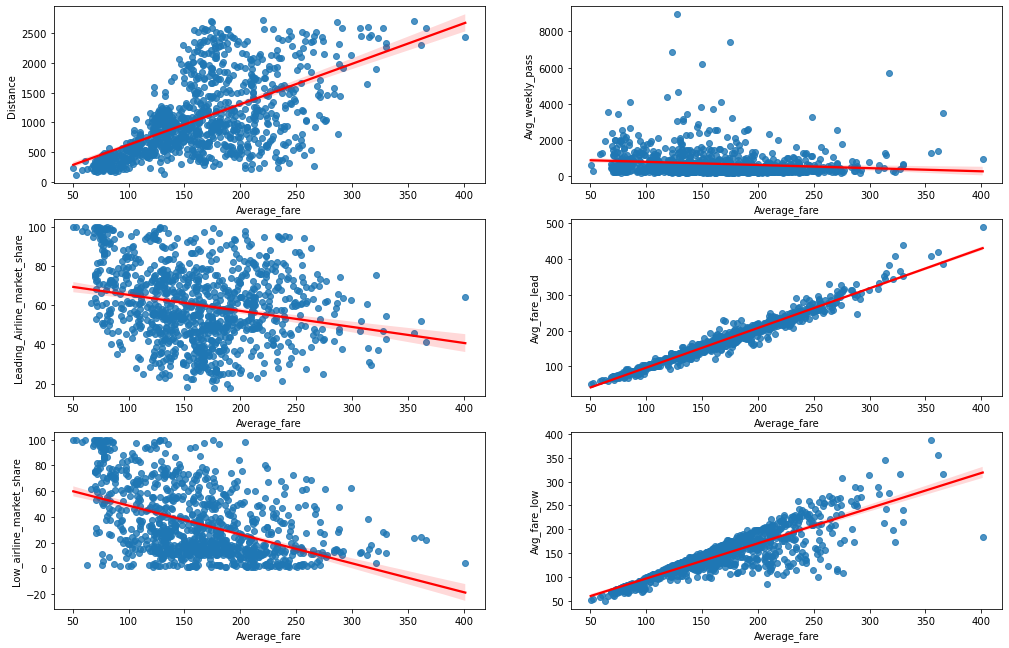

In [16]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    if i!='Average_fare':
        plt.subplot(4,2,t)
        sns.regplot(data['Average_fare'],data[i],line_kws={'color':'r'})
        t=t+1

<AxesSubplot:>

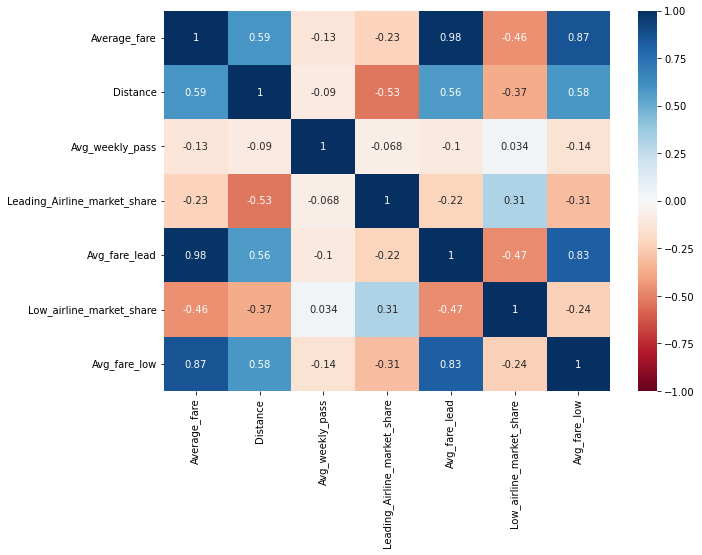

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu')

<AxesSubplot:>

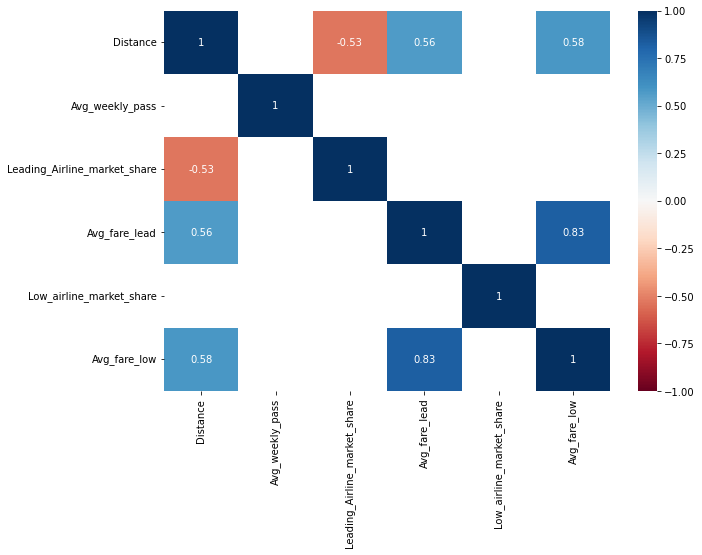

In [18]:
data_wy = data.drop(columns=['Average_fare'])
plt.figure(figsize=(10,7))
sns.heatmap(data_wy.corr()[(data.corr()>0.5)|(data.corr()<-0.5)],annot=True,vmax=1,vmin=-1,cmap='RdBu')

In [19]:
abs(data.corr()['Average_fare']).sort_values(ascending=False)

Average_fare                    1.000000
Avg_fare_lead                   0.981462
Avg_fare_low                    0.866410
Distance                        0.587169
Low_airline_market_share        0.458660
Leading_Airline_market_share    0.234142
Avg_weekly_pass                 0.126175
Name: Average_fare, dtype: float64

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
numeric = data_wy.select_dtypes(include=np.number)

In [22]:
vif = [variance_inflation_factor(numeric.values,i) for i in range(numeric.shape[1])]

In [23]:
pd.DataFrame({'VIF':vif[:]},index=numeric.columns)

,VIF
Distance,6.530828
Avg_weekly_pass,1.670023
Leading_Airline_market_share,8.101225
Avg_fare_lead,36.956474
Low_airline_market_share,4.036873
Avg_fare_low,39.000002


In [24]:
data.drop(columns=['Avg_fare_low'],inplace=True)

In [25]:
data

,City1,City2,Average_fare,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34
...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74


In [26]:
# Outlier Treatment (Capping)

for i in data.select_dtypes(include=np.number).columns:
    Q1,Q3 = np.quantile(data[i],[0.25,0.75])
    IQR = Q3-Q1
    UL = Q3+(1.5*IQR)
    LL = Q1-(1.5*IQR)
    
    data.loc[data[i]>UL,i]= UL
    data.loc[data[i]<LL,i]= LL

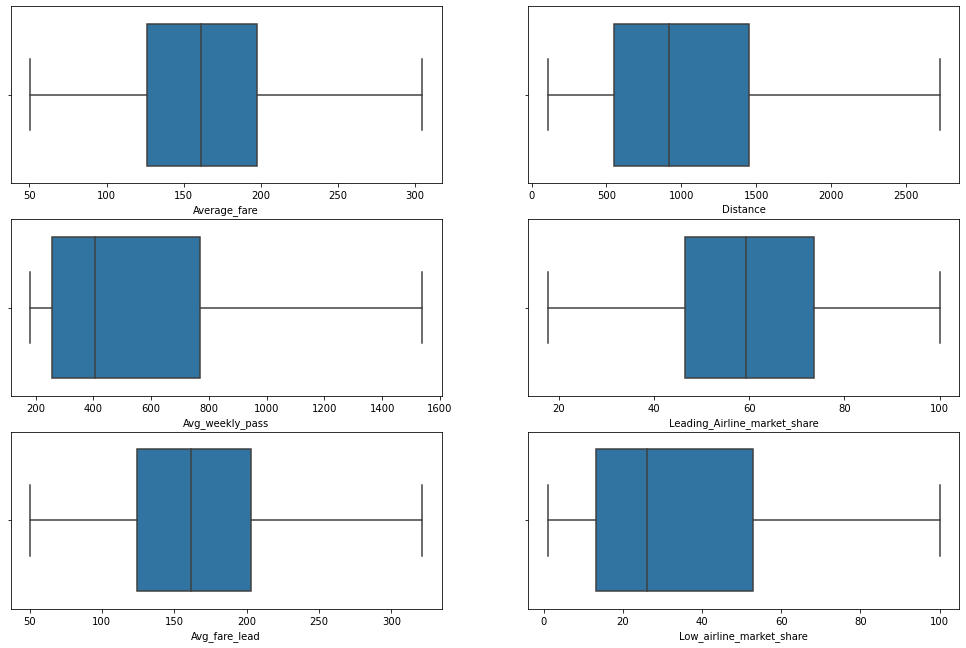

In [27]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    t=t+1

In [28]:
# Perform The Significance Test

In [29]:
numeric = data.select_dtypes(include=np.number).columns

In [30]:
import scipy.stats as st
sig_features = []
for i in numeric:
    if i != 'Average_fare':
        if st.ttest_ind(data[i],data['Average_fare'])[1]<0.05:
            print(i,st.ttest_ind(data[i],data['Average_fare'])[1])
            sig_features.append(i)
            
print(sig_features)


Distance 2.5507937972858612e-294
Avg_weekly_pass 4.76790171898488e-175
Leading_Airline_market_share 0.0
Low_airline_market_share 0.0
['Distance', 'Avg_weekly_pass', 'Leading_Airline_market_share', 'Low_airline_market_share']


In [31]:
categorical = data.select_dtypes(include='object')

In [32]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

for i in categorical:
    mod = ols('Average_fare ~ %s'%(i),data=data).fit()
    aov = sm.stats.anova_lm(mod,typ=2)
    print(aov)

                sum_sq     df         F        PR(>F)
City1     7.981607e+05   89.0  3.844617  2.892156e-25
Residual  2.122700e+06  910.0       NaN           NaN
                sum_sq     df         F        PR(>F)
City2     7.158136e+05   84.0  3.536095  3.863020e-21
Residual  2.205047e+06  915.0       NaN           NaN
                       sum_sq     df          F         PR(>F)
Leading_Airline  1.203685e+06   15.0  45.983487  1.779566e-102
Residual         1.717176e+06  984.0        NaN            NaN
                         sum_sq     df          F        PR(>F)
Low_price_airline  7.430066e+05   18.0  18.593468  4.856008e-51
Residual           2.177854e+06  981.0        NaN           NaN


## Split the dataset in 80:20 Ratio

In [33]:
x = data.drop(columns=['Average_fare'])
y = data['Average_fare']

In [34]:
x

,City1,City2,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34
...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,1104,184.34,US,33.37,135.82,DL,28.65
996,TLH,TPA,200,232.71,FL,99.57,82.55,FL,99.57
997,TPA,IAD,814,843.80,US,46.19,159.65,DL,13.89
998,TPA,PBI,174,214.45,WN,99.74,73.44,WN,99.74


In [35]:
freq_map = {}
for i in categorical.columns:
    freq_map[i]=x[i].value_counts().to_dict()

In [36]:
freq_map

{'City1': {'ATL': 64,
  'ORD': 63,
  'DFW': 52,
  'BWI': 47,
  'IAH': 38,
  'BOS': 38,
  'LAS': 37,
  'DEN': 36,
  'DTW': 33,
  'LAX': 31,
  'FLL': 29,
  'LGA': 28,
  'MCI': 23,
  'CLE': 22,
  'AUS': 21,
  'MSP': 20,
  'CLT': 18,
  'CMH': 18,
  'PHX': 18,
  'ABQ': 18,
  'MCO': 17,
  'MSY': 15,
  'BDL': 14,
  'MIA': 13,
  'IND': 12,
  'OAK': 12,
  'CVG': 12,
  'PHL': 11,
  'PDX': 11,
  'BNA': 11,
  'BUR': 10,
  'STL': 9,
  'BUF': 9,
  'RSW': 8,
  'BHM': 8,
  'ONT': 8,
  'BOI': 8,
  'ALB': 8,
  'MKE': 7,
  'SLC': 7,
  'JAX': 7,
  'MEM': 6,
  'SMF': 6,
  'ELP': 6,
  'SAN': 6,
  'PVD': 5,
  'ISP': 5,
  'RDU': 5,
  'LGB': 4,
  'SFO': 4,
  'ACY': 4,
  'SEA': 4,
  'SJC': 4,
  'GRR': 4,
  'SDF': 4,
  'OMA': 4,
  'MHT': 3,
  'RNO': 3,
  'GSO': 3,
  'COS': 3,
  'SAT': 3,
  'PSP': 3,
  'DAY': 3,
  'ORF': 3,
  'PIT': 3,
  'AMA': 2,
  'TPA': 2,
  'CAK': 2,
  'OKC': 2,
  'CRP': 2,
  'DSM': 2,
  'SYR': 1,
  'TLH': 1,
  'SNA': 1,
  'ROC': 1,
  'TYS': 1,
  'PHF': 1,
  'MYR': 1,
  'MSN': 1,
  'LIT': 1,


In [37]:
for i in categorical.columns:
    x[i]= x[i].map(freq_map[i])

In [38]:
x.head()

,City1,City2,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share
0,2,3,528,424.56,16,70.19,111.03,60,70.19
1,2,43,860,276.84,16,75.10,123.09,151,17.23
2,8,3,852,215.76,162,78.89,223.98,45,2.77
3,8,4,288,606.84,257,96.97,68.86,230,96.97
4,8,9,723,313.04,91,39.79,161.36,230,15.34


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=2)

In [41]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 9), (200, 9), (800,), (200,))

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
x_train_s= sc.fit_transform(x_train)

In [45]:
x_train_s = pd.DataFrame(x_train_s,columns=x_train.columns)

In [46]:
x_train_s

,City1,City2,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share
0,-1.028698,0.166730,-0.848109,-0.763722,1.476092,1.308167,-1.111178,0.443054,-0.845512
1,-0.669842,1.201284,-0.145216,-0.090152,-0.832592,-0.810343,0.415129,-0.846417,-0.474584
2,0.457989,0.905697,-1.261391,2.274302,1.476092,0.794589,-1.631472,1.504181,1.497190
3,-1.131228,-0.276651,-0.829324,-0.470754,0.315642,0.720633,-0.756839,0.443054,1.444148
4,0.509254,-1.015619,-0.315852,-0.713292,-1.467786,0.388348,0.485963,-0.779257,-1.227122
...,...,...,...,...,...,...,...,...,...
795,0.047869,-0.128858,2.553642,-0.950907,0.315642,-0.604911,0.167041,0.147550,-0.634816
796,0.509254,-1.532896,-0.907597,-0.544186,1.476092,0.304122,-1.037983,1.504181,1.145416
797,0.252929,-0.128858,1.395199,-0.849310,-0.612717,-0.013783,1.219097,-0.806121,-0.828568
798,0.047869,1.349078,0.022288,2.274302,0.315642,-1.492374,-0.718217,-1.370264,-0.761897


In [47]:
import statsmodels.api as sm

In [48]:
X = sm.add_constant(x_train_s)

In [49]:
X

,const,City1,City2,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share
0,1.0,-1.028698,0.166730,-0.848109,-0.763722,1.476092,1.308167,-1.111178,0.443054,-0.845512
1,1.0,-0.669842,1.201284,-0.145216,-0.090152,-0.832592,-0.810343,0.415129,-0.846417,-0.474584
2,1.0,0.457989,0.905697,-1.261391,2.274302,1.476092,0.794589,-1.631472,1.504181,1.497190
3,1.0,-1.131228,-0.276651,-0.829324,-0.470754,0.315642,0.720633,-0.756839,0.443054,1.444148
4,1.0,0.509254,-1.015619,-0.315852,-0.713292,-1.467786,0.388348,0.485963,-0.779257,-1.227122
...,...,...,...,...,...,...,...,...,...,...
795,1.0,0.047869,-0.128858,2.553642,-0.950907,0.315642,-0.604911,0.167041,0.147550,-0.634816
796,1.0,0.509254,-1.532896,-0.907597,-0.544186,1.476092,0.304122,-1.037983,1.504181,1.145416
797,1.0,0.252929,-0.128858,1.395199,-0.849310,-0.612717,-0.013783,1.219097,-0.806121,-0.828568
798,1.0,0.047869,1.349078,0.022288,2.274302,0.315642,-1.492374,-0.718217,-1.370264,-0.761897


## FIT a base model

In [50]:
y_train = y_train.reset_index()

In [51]:
y_train.drop(columns=['index'],inplace=True)

In [52]:
base_model = sm.OLS(y_train,X).fit()

In [53]:
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Average_fare   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2798.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:13:37   Log-Likelihood:                -2924.3
No. Observations:                 800   AIC:                             5869.
Df Residuals:                     790   BIC:                             5915.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [54]:
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [55]:
pd.DataFrame({'VIF':vif[:]},index=X.columns)

,VIF
const,1.000000
City1,1.653988
City2,1.609868
Distance,2.043862
Avg_weekly_pass,1.373874
Leading_Airline,1.456610
Leading_Airline_market_share,1.553590
Avg_fare_lead,2.044595
Low_price_airline,1.409422
Low_airline_market_share,1.501929


<AxesSubplot:>

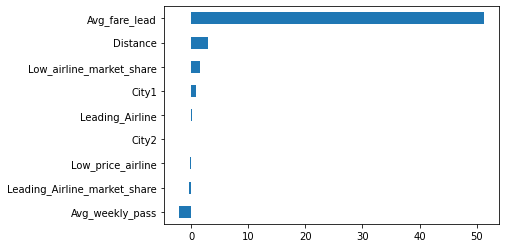

In [56]:
base_model.params[1:].sort_values().plot(kind='barh')

In [57]:
x_test_s = sc.fit_transform(x_test)

In [58]:
X_t = sm.add_constant(x_test_s)

In [59]:
y_pred = base_model.predict(X_t)

In [60]:
from sklearn.metrics import r2_score,mean_squared_error

In [61]:
y_pred_train = base_model.predict(X)

In [62]:
rmse_train = (mean_squared_error(y_train,y_pred_train))**0.5

In [63]:
rmse_train

9.359393294015831

In [64]:
rmse_test = (mean_squared_error(y_test,y_pred))**0.5

In [65]:
rmse_test

9.854867305894853

In [66]:
r2_score(y_test,y_pred)

0.9684825427371506

<AxesSubplot:ylabel='Density'>

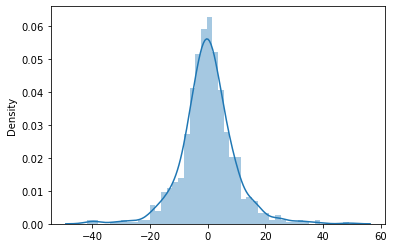

In [67]:
sns.distplot(base_model.resid)

In [68]:
from statsmodels.graphics.gofplots import qqplot

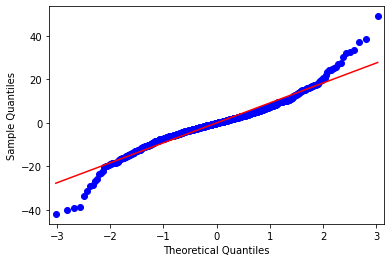

In [69]:
qqplot(base_model.resid,line='r')
plt.show()

In [70]:
base_model.resid.skew()

0.07345655665149974

In [71]:
base_model.resid.kurt()

3.6449871585811158

## Model with Variable Tranformation

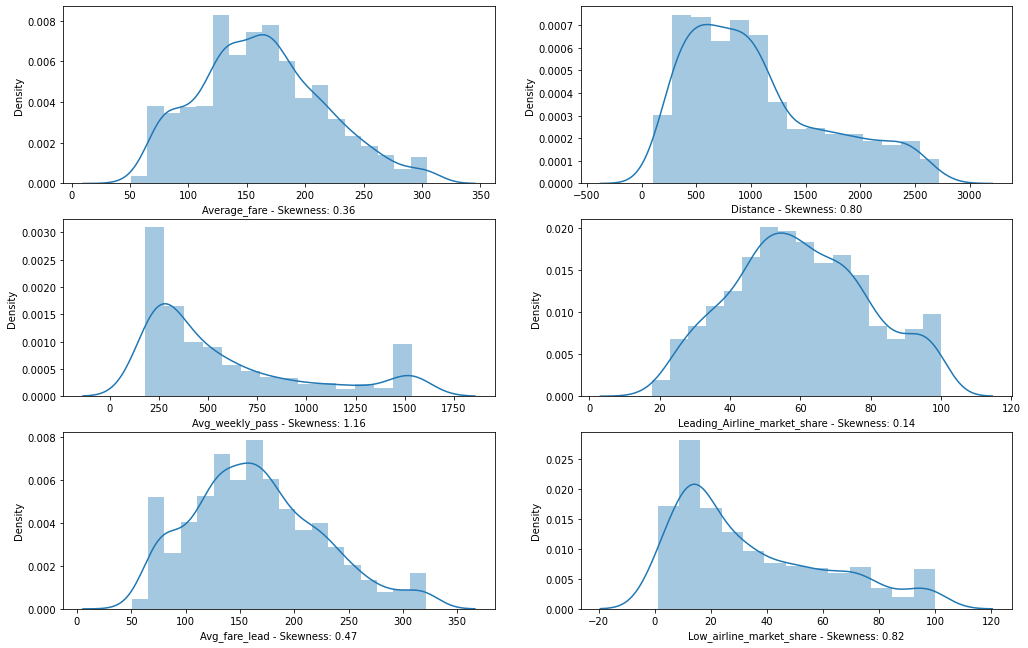

In [72]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s - Skewness: %.2f'%(i,data[i].skew()))
    t=t+1

In [73]:
numeric

Index(['Average_fare', 'Distance', 'Avg_weekly_pass',
       'Leading_Airline_market_share', 'Avg_fare_lead',
       'Low_airline_market_share'],
      dtype='object')

In [74]:
for i in numeric:
    if i!='Average_fare':
        data[i] = list(np.sqrt(data[i]))

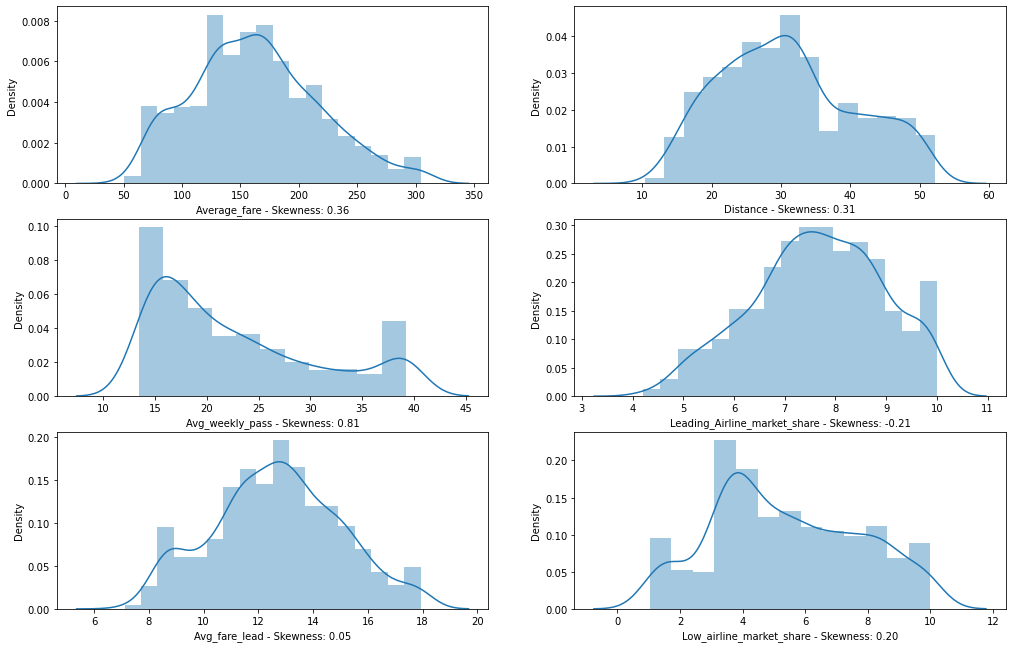

In [75]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s - Skewness: %.2f'%(i,data[i].skew()))
    t=t+1

In [76]:
x = data.drop(columns=['Average_fare'])
y = data['Average_fare']

In [77]:
freq_map = {}
for i in categorical.columns:
    freq_map[i]=x[i].value_counts().to_dict()
    
for i in categorical.columns:
    x[i]= x[i].map(freq_map[i])

In [78]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=2)

x_train_s= sc.fit_transform(x_train)

x_train_s = pd.DataFrame(x_train_s,columns=x_train.columns)

In [79]:
X = sm.add_constant(x_train_s)

In [80]:
y_train = y_train.reset_index()

In [81]:
y_train.drop(columns=['index'],inplace=True)

In [82]:
model_2 = sm.OLS(y_train,X).fit()

In [83]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Average_fare   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2496.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:13:42   Log-Likelihood:                -2968.4
No. Observations:                 800   AIC:                             5957.
Df Residuals:                     790   BIC:                             6004.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Let us Try some Other Models

In [84]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold

In [89]:
def model_result(model,x_train,y_train,x_test,y_test):
    print(str(model))
    n = x_train.shape[0]
    p = x_train.shape[1]
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('R2:\t',r2)
    print('Adj R2:\t',adj_r2)
    print('MSE:\t',mean_squared_error(y_test,y_pred))
    print('RMSE:\t',mean_squared_error(y_test,y_pred)**0.5,'\n')

In [90]:
kf = KFold(n_splits=2)

In [91]:
for train,test in kf.split(x_train_s,y_train):
    x_tr,x_te = x_train.iloc[train,:],x_train.iloc[test,:]
    y_tr,y_te = y_train.iloc[train,:],y_train.iloc[test,:]
    model_result(LinearRegression(),x_tr,y_tr,x_te,y_te)

LinearRegression()
R2:	 0.9639097143863781
Adj R2:	 0.9630768616414483
MSE:	 94.09649749626264
RMSE:	 9.700334916705847 

LinearRegression()
R2:	 0.9635782251360382
Adj R2:	 0.9627377226391776
MSE:	 114.4270584020089
RMSE:	 10.697058399485762 



In [92]:
model_result(LinearRegression(),x_train_s,y_train,x_test_s,y_test)
model_result(SGDRegressor(),x_train_s,y_train,x_test_s,y_test)
model_result(Ridge(alpha=0.1),x_train_s,y_train,x_test_s,y_test)
model_result(ElasticNet(alpha=0.1,l1_ratio=0.2),x_train_s,y_train,x_test_s,y_test)

LinearRegression()
R2:	 0.968052981694334
Adj R2:	 0.9676890283212314
MSE:	 98.44206605785162
RMSE:	 9.921797521510486 

SGDRegressor()
R2:	 0.9683710760854426
Adj R2:	 0.968010746572492
MSE:	 97.46188478514127
RMSE:	 9.872278601475005 

Ridge(alpha=0.1)
R2:	 0.9680517862787079
Adj R2:	 0.9676878192869464
MSE:	 98.44574963116352
RMSE:	 9.921983150114876 

ElasticNet(alpha=0.1, l1_ratio=0.2)
R2:	 0.9578502943668711
Adj R2:	 0.9573701078469999
MSE:	 129.8807940871141
RMSE:	 11.396525526980323 



In [99]:
from sklearn.model_selection import GridSearchCV

In [115]:
param ={"alpha":[0.0001,0.001,0.01,0.1,1,10,100,1000],
            "fit_intercept":[True,False]}

In [116]:
gscv=GridSearchCV(estimator=Ridge(), param_grid=param, scoring="r2",cv=3,verbose=3)

In [117]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END ..alpha=0.0001, fit_intercept=True;, score=0.959 total time=   0.0s
[CV 2/3] END ..alpha=0.0001, fit_intercept=True;, score=0.969 total time=   0.0s
[CV 3/3] END ..alpha=0.0001, fit_intercept=True;, score=0.963 total time=   0.0s
[CV 1/3] END .alpha=0.0001, fit_intercept=False;, score=0.921 total time=   0.0s
[CV 2/3] END .alpha=0.0001, fit_intercept=False;, score=0.931 total time=   0.0s
[CV 3/3] END .alpha=0.0001, fit_intercept=False;, score=0.913 total time=   0.0s
[CV 1/3] END ...alpha=0.001, fit_intercept=True;, score=0.959 total time=   0.0s
[CV 2/3] END ...alpha=0.001, fit_intercept=True;, score=0.969 total time=   0.0s
[CV 3/3] END ...alpha=0.001, fit_intercept=True;, score=0.963 total time=   0.0s
[CV 1/3] END ..alpha=0.001, fit_intercept=False;, score=0.921 total time=   0.0s
[CV 2/3] END ..alpha=0.001, fit_intercept=False;, score=0.931 total time=   0.0s
[CV 3/3] END ..alpha=0.001, fit_intercept=False;

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False]},
             scoring='r2', verbose=3)

In [118]:
gscv.best_params_

{'alpha': 0.0001, 'fit_intercept': True}

In [120]:
gscv.best_score_

0.9636807885741523

In [121]:
model_ridge=Ridge(**gscv.best_params_)

In [122]:
## ** args takes input as a tuple.
## **kwargs takes input as a dictionary

In [123]:
model_ridge.fit(x_test,y_test)

Ridge(alpha=0.0001)

In [136]:
model_ridge.score(x_test,y_test)

0.9673881208752867

In [145]:
## Lasso Regression

In [147]:
from sklearn.linear_model import Lasso

In [149]:
Model_lasso= Lasso()

In [151]:
Model_lasso.fit(x_train,y_train)

Lasso()

In [152]:
Model_lasso.coef_

array([ 6.93546981e-03, -2.49490243e-02,  1.96849648e-01, -9.78878935e-02,
        8.76473543e-03,  0.00000000e+00,  2.25197353e+01,  5.84227230e-03,
        7.34844572e-01])

In [153]:
pd.DataFrame({"Columns":x_train.columns,"Coef":Model_lasso.coef_})

,Columns,Coef
0,City1,0.006935
1,City2,-0.024949
2,Distance,0.196850
3,Avg_weekly_pass,-0.097888
4,Leading_Airline,0.008765
5,Leading_Airline_market_share,0.000000
6,Avg_fare_lead,22.519735
7,Low_price_airline,0.005842
8,Low_airline_market_share,0.734845


In [154]:
Model_lasso.intercept_

array([-131.58360367])

In [157]:
Model_lasso.alpha

1.0

In [128]:
from sklearn.linear_model import ElasticNetCV

In [130]:
l1={"l1_ratio":[0.5,0.4,0.2,0.001,0.01]}

In [158]:
EL= ElasticNetCV()

In [161]:
EL=ElasticNetCV(cv=5,alphas=0.001,verbose=3)

In [162]:
EL.fit(x_train,y_train)

AxisError: axis -1 is out of bounds for array of dimension 0